<a href="https://colab.research.google.com/github/SiddativeG/Marketing-Research-Models/blob/main/Amazon_Orders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-af898ae24456>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["ORDERDATE"] = pd.to_datetime(df["ORDERDATE"], errors='coerce')
<ipython-input-1-af898ae24456>:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["SHIPDATE"] = pd.to_datetime(df["SHIPDATE"], errors='coerce')


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
Index: 8336 entries, 0 to 8398
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ROWID               8336 non-null   int64         
 1   ORDERID             8336 non-null   int64         
 2   ORDERDATE           8336 non-null   datetime64[ns]
 3   ORDERPRIOTORITY     8336 non-null   object        
 4   ORDERQUANTITY       8336 non-null   int64         
 5   SALES               8336 non-null   float64       
 6   DISCOUNT            8336 non-null   float64       
 7   SHIPMODE            8336 non-null   object        
 8   PROFIT              8336 non-null   float64       
 9   UNITPRICE           8336 non-null   float64       
 10  SHIPPINGCOSTS       8336 non-null   float64       
 11  CUSTOMERNAME        8336 non-null   object        
 12  PROVINCE            8336 non-null   object        
 13  REGION              8336 non-null  

<ipython-input-1-af898ae24456>:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="CUSTOMERSEGMENT", y="SALES", data=df, estimator=sum, ci=None)


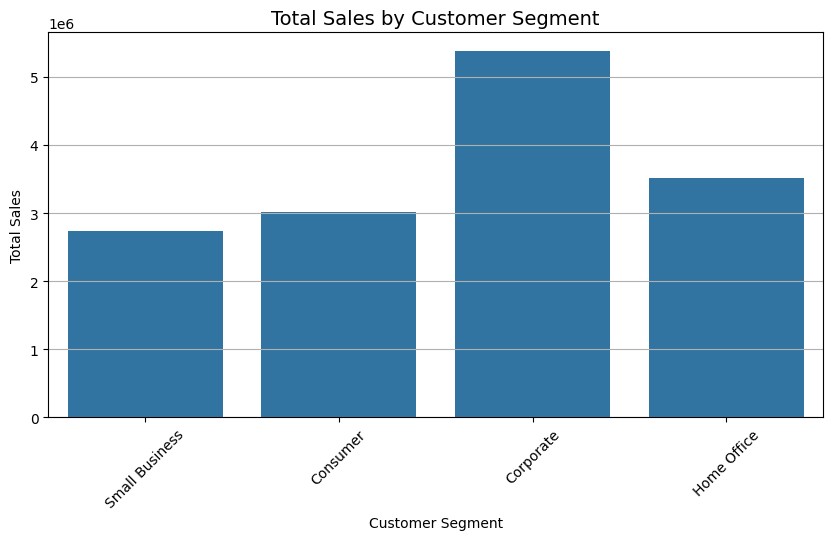

<ipython-input-1-af898ae24456>:35: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="PRODUCTCATEGORY", y="PROFIT", data=df, estimator=sum, ci=None)


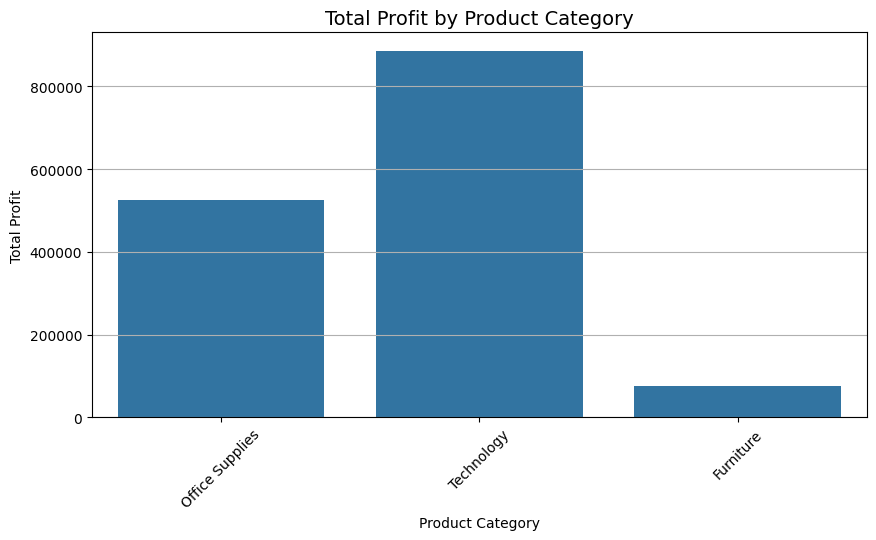

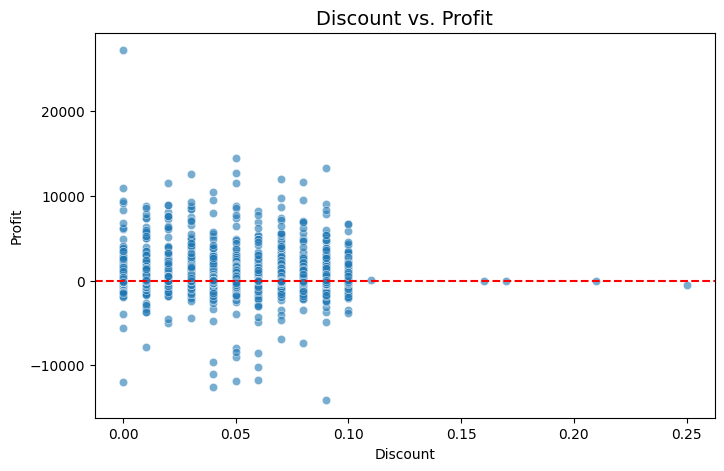

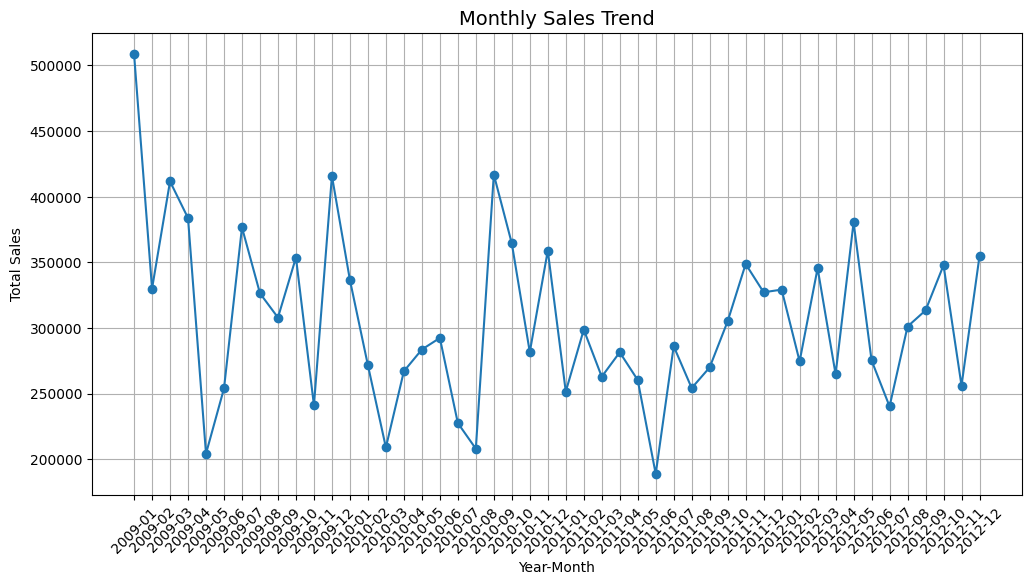

<ipython-input-1-af898ae24456>:67: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="SHIPMODE", y="SALES", data=df, estimator=sum, ci=None)


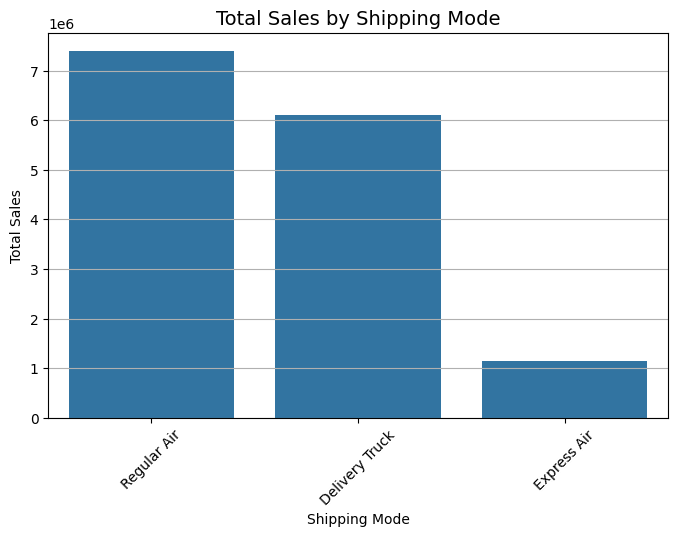

<ipython-input-1-af898ae24456>:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="CUSTOMERNAME", x="SALES", data=top_customers, palette="coolwarm")


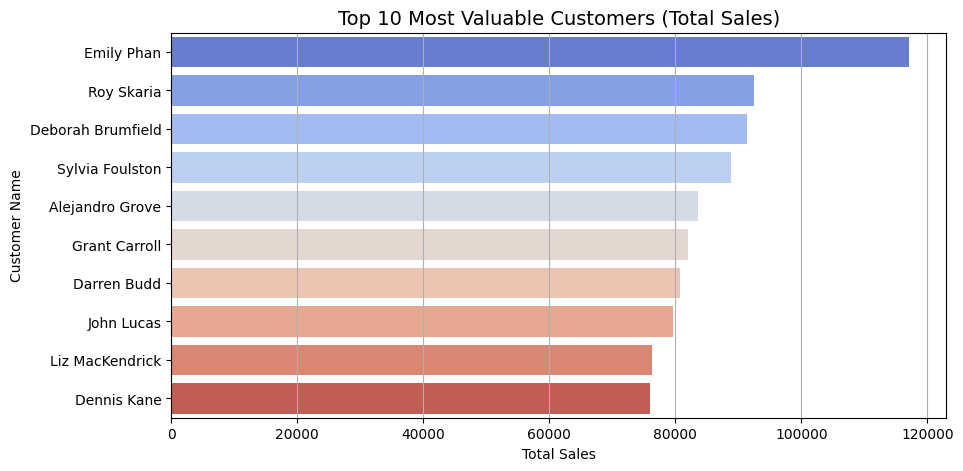

<ipython-input-1-af898ae24456>:88: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="REGION", y="PROFIT", data=df, estimator=sum, ci=None)


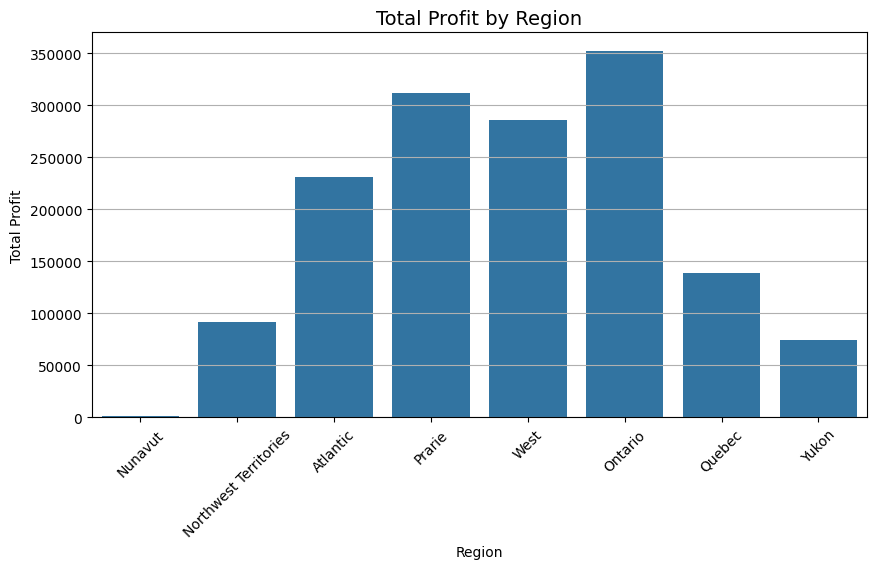

<ipython-input-1-af898ae24456>:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="ORDERPRIOTORITY", data=df, order=df["ORDERPRIOTORITY"].value_counts().index, palette="viridis")


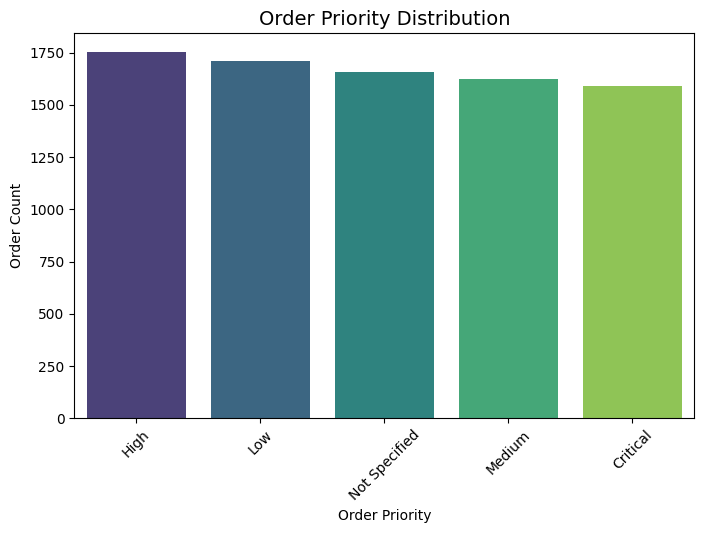

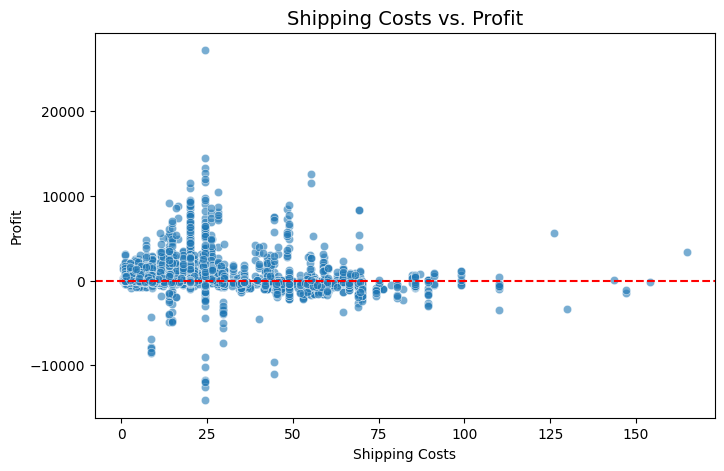


✅ Analysis Completed! All visualizations have been generated.


In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (Update file path if needed)
file_path = "ORDERS.csv"  # Change this to your file path
df = pd.read_csv(file_path, encoding='latin1')  # Change encoding if needed

# Convert date columns to datetime
df["ORDERDATE"] = pd.to_datetime(df["ORDERDATE"], errors='coerce')
df["SHIPDATE"] = pd.to_datetime(df["SHIPDATE"], errors='coerce')

# Handle missing values (optional: drop or fill missing values)
df.dropna(inplace=True)

# Data Overview
print("Dataset Overview:")
print(df.info())

# ------------------------- ANALYSIS & VISUALIZATIONS -------------------------

# 1️⃣ Total Sales by Customer Segment
plt.figure(figsize=(10, 5))
sns.barplot(x="CUSTOMERSEGMENT", y="SALES", data=df, estimator=sum, ci=None)
plt.title("Total Sales by Customer Segment", fontsize=14)
plt.xlabel("Customer Segment")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

# 2️⃣ Total Profit by Product Category
plt.figure(figsize=(10, 5))
sns.barplot(x="PRODUCTCATEGORY", y="PROFIT", data=df, estimator=sum, ci=None)
plt.title("Total Profit by Product Category", fontsize=14)
plt.xlabel("Product Category")
plt.ylabel("Total Profit")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

# 3️⃣ Discount vs Profit Analysis (Scatter Plot)
plt.figure(figsize=(8, 5))
sns.scatterplot(x="DISCOUNT", y="PROFIT", data=df, alpha=0.6)
plt.title("Discount vs. Profit", fontsize=14)
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.axhline(y=0, color='r', linestyle='--')  # Red line to highlight loss/profit separation
plt.show()

# 4️⃣ Sales Over Time (Trend Analysis)
df["YearMonth"] = df["ORDERDATE"].dt.to_period("M")  # Extract Year-Month
sales_trend = df.groupby("YearMonth")["SALES"].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(sales_trend["YearMonth"].astype(str), sales_trend["SALES"], marker="o", linestyle="-")
plt.title("Monthly Sales Trend", fontsize=14)
plt.xlabel("Year-Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid()
plt.show()

# 5️⃣ Sales by Shipping Mode
plt.figure(figsize=(8, 5))
sns.barplot(x="SHIPMODE", y="SALES", data=df, estimator=sum, ci=None)
plt.title("Total Sales by Shipping Mode", fontsize=14)
plt.xlabel("Shipping Mode")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

# 6️⃣ Most Valuable Customers (Top 10 by Sales)
top_customers = df.groupby("CUSTOMERNAME")["SALES"].sum().nlargest(10).reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(y="CUSTOMERNAME", x="SALES", data=top_customers, palette="coolwarm")
plt.title("Top 10 Most Valuable Customers (Total Sales)", fontsize=14)
plt.xlabel("Total Sales")
plt.ylabel("Customer Name")
plt.grid(axis="x")
plt.show()

# 7️⃣ Profitability by Region
plt.figure(figsize=(10, 5))
sns.barplot(x="REGION", y="PROFIT", data=df, estimator=sum, ci=None)
plt.title("Total Profit by Region", fontsize=14)
plt.xlabel("Region")
plt.ylabel("Total Profit")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

# 8️⃣ Order Priority Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x="ORDERPRIOTORITY", data=df, order=df["ORDERPRIOTORITY"].value_counts().index, palette="viridis")
plt.title("Order Priority Distribution", fontsize=14)
plt.xlabel("Order Priority")
plt.ylabel("Order Count")
plt.xticks(rotation=45)
plt.show()

# 9️⃣ Shipping Costs vs Profit (Scatter Plot)
plt.figure(figsize=(8, 5))
sns.scatterplot(x="SHIPPINGCOSTS", y="PROFIT", data=df, alpha=0.6)
plt.title("Shipping Costs vs. Profit", fontsize=14)
plt.xlabel("Shipping Costs")
plt.ylabel("Profit")
plt.axhline(y=0, color='r', linestyle='--')  # Red line to highlight loss/profit separation
plt.show()

# ---------------------- END OF ANALYSIS ----------------------

print("\n✅ Analysis Completed! All visualizations have been generated.")


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<ipython-input-4-3831756b4b00>:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["ORDERDATE"] = pd.to_datetime(df["ORDERDATE"], errors='coerce')
<ipython-input-4-3831756b4b00>:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["SHIPDATE"] = pd.to_datetime(df["SHIPDATE"], errors='coerce')
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvho76t9_/fs0w8adv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvho76t9_/wp25xvb0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan a

Top Customers based on RFM Analysis:
               Recency  Frequency    Monetary R_Score F_Score M_Score  \
CUSTOMERNAME                                                            
Ionia McGrath     4457         18  42314.5975       4       4       4   
Mick Crebagga     4445         20  31042.3140       4       4       4   
Pauline Chand     4467         24  38343.6275       4       4       4   
Juliana Krohn     4493         15  46672.0090       4       4       4   
Ed Braxton        4448         37  74111.2500       4       4       4   
Patrick Jones     4475         30  35186.0240       4       4       4   
Steve Chapman     4478         16  42872.9900       4       4       4   
Jack O'Briant     4492         28  56974.6940       4       4       4   
Doug Bickford     4470         22  28054.6560       4       4       4   
Jack Lebron       4452         22  51155.7990       4       4       4   

              RFM_Score  
CUSTOMERNAME             
Ionia McGrath       444  
Mick Cre

06:25:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


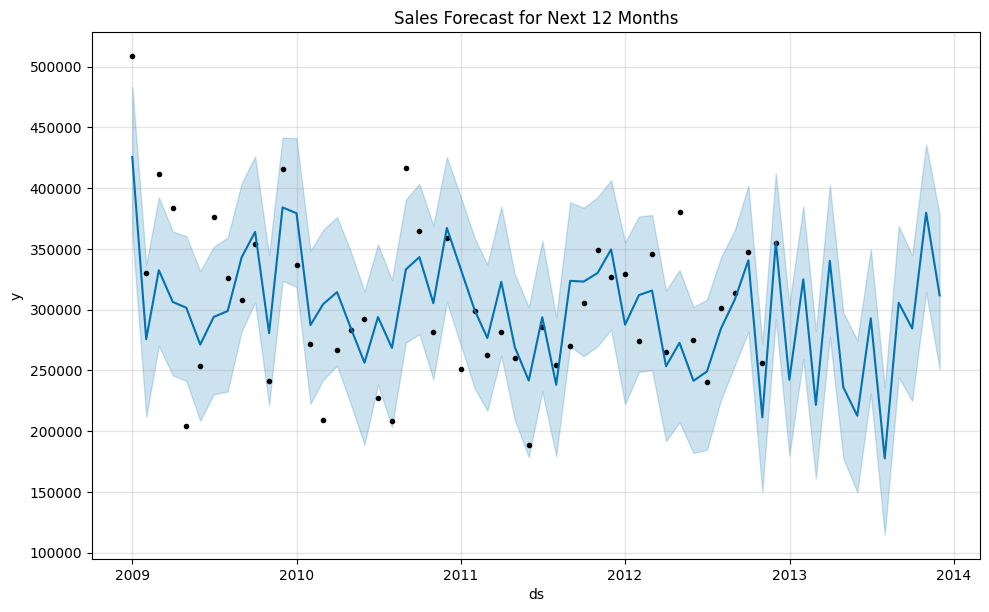

<ipython-input-4-3831756b4b00>:69: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="PRODUCTCATEGORY", y="SALES", data=df, estimator=sum, ci=None)


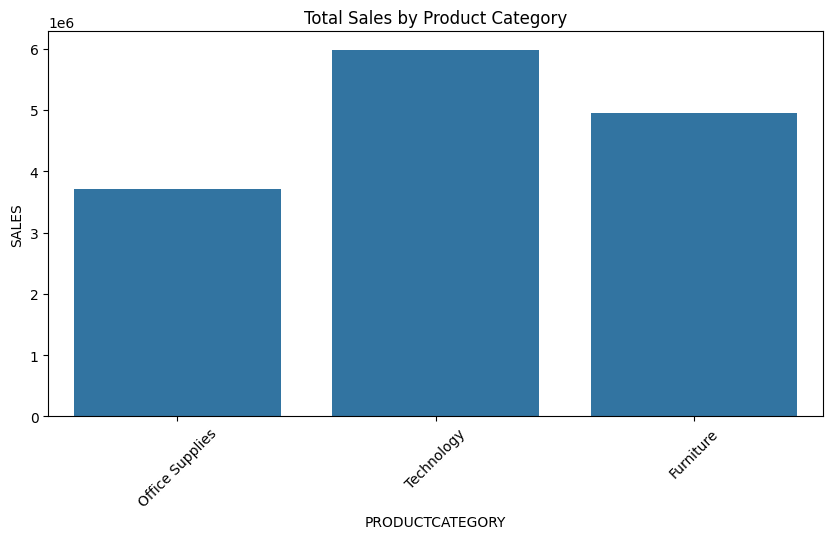


Top 10 Customers by Lifetime Value:
        CUSTOMERNAME        SALES
0         Emily Phan  117124.4380
1         Roy Skaria   92542.1530
2  Deborah Brumfield   91453.2955
3    Sylvia Foulston   88875.7575
4    Alejandro Grove   83561.9300
5      Grant Carroll   82020.8025
6        Darren Budd   80706.5935
7         John Lucas   79696.1875
8    Liz MacKendrick   76306.4315
9        Dennis Kane   75967.5905


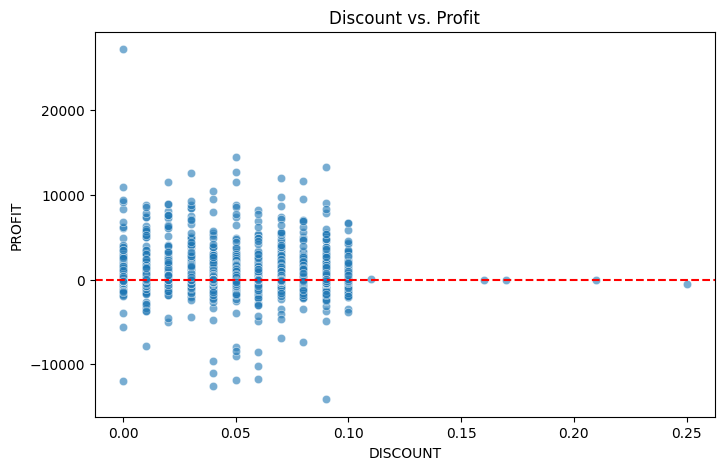

<ipython-input-4-3831756b4b00>:91: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="SHIPMODE", y="SALES", data=df, estimator=sum, ci=None)


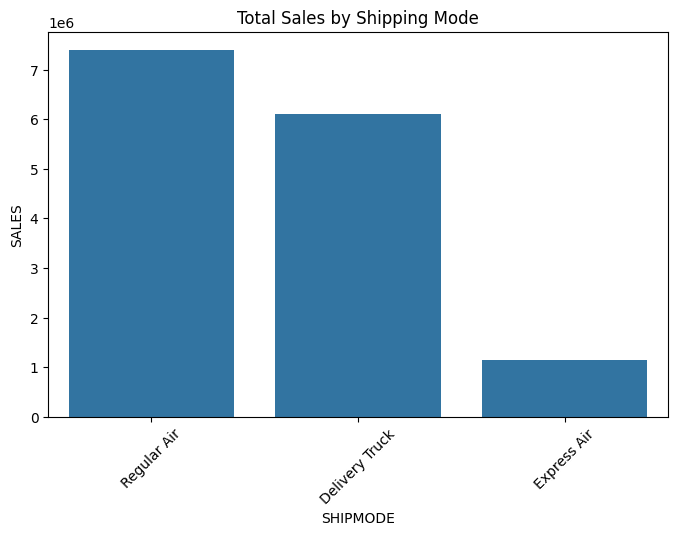

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


ValueError: The input DataFrame `df` containing the frequent itemsets is empty.

In [4]:
# 📌 Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

!pip install prophet mlxtend

# Machine Learning / Forecasting Libraries
from prophet import Prophet  # Time Series Forecasting
from mlxtend.frequent_patterns import apriori, association_rules  # Market Basket Analysis


# Load dataset (Update file path)
file_path = "ORDERS.csv"  # Update your file path
df = pd.read_csv(file_path, encoding='latin1')

# Convert dates to datetime
df["ORDERDATE"] = pd.to_datetime(df["ORDERDATE"], errors='coerce')
df["SHIPDATE"] = pd.to_datetime(df["SHIPDATE"], errors='coerce')

# Handle missing values
df.dropna(inplace=True)

# ---------------- 1️⃣ Customer Segmentation (RFM Analysis) ----------------

# RFM (Recency, Frequency, Monetary) Analysis
rfm = df.groupby("CUSTOMERNAME").agg({
    "ORDERDATE": lambda x: (datetime.today() - x.max()).days,  # Recency (days since last order)
    "ORDERID": "count",  # Frequency (number of orders)
    "SALES": "sum"  # Monetary (total spend)
}).rename(columns={"ORDERDATE": "Recency", "ORDERID": "Frequency", "SALES": "Monetary"})

# Normalize RFM scores
rfm["R_Score"] = pd.qcut(rfm["Recency"], 4, labels=[4,3,2,1])
rfm["F_Score"] = pd.qcut(rfm["Frequency"].rank(method="first"), 4, labels=[1,2,3,4])
rfm["M_Score"] = pd.qcut(rfm["Monetary"], 4, labels=[1,2,3,4])

# Create RFM Score
rfm["RFM_Score"] = rfm["R_Score"].astype(str) + rfm["F_Score"].astype(str) + rfm["M_Score"].astype(str)

# Display Top Customers
print("Top Customers based on RFM Analysis:")
print(rfm.sort_values("RFM_Score", ascending=False).head(10))

# ---------------- 2️⃣ Sales Forecasting using Prophet ----------------

sales_trend = df.groupby(df["ORDERDATE"].dt.to_period("M"))["SALES"].sum().reset_index()
sales_trend.columns = ["ds", "y"]
sales_trend["ds"] = sales_trend["ds"].astype(str)

# Initialize Prophet model
model = Prophet()
model.fit(sales_trend)

# Forecast next 12 months
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

# Plot Forecast
model.plot(forecast)
plt.title("Sales Forecast for Next 12 Months")
plt.show()

# ---------------- 3️⃣ Product Performance Analysis ----------------

plt.figure(figsize=(10, 5))
sns.barplot(x="PRODUCTCATEGORY", y="SALES", data=df, estimator=sum, ci=None)
plt.title("Total Sales by Product Category")
plt.xticks(rotation=45)
plt.show()

# ---------------- 4️⃣ Customer Lifetime Value (CLV) Calculation ----------------

clv = df.groupby("CUSTOMERNAME")["SALES"].sum().sort_values(ascending=False).reset_index()
print("\nTop 10 Customers by Lifetime Value:")
print(clv.head(10))

# ---------------- 5️⃣ Impact of Discounts on Sales & Profit ----------------

plt.figure(figsize=(8, 5))
sns.scatterplot(x="DISCOUNT", y="PROFIT", data=df, alpha=0.6)
plt.title("Discount vs. Profit")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# ---------------- 6️⃣ Shipping & Logistics Optimization ----------------

plt.figure(figsize=(8, 5))
sns.barplot(x="SHIPMODE", y="SALES", data=df, estimator=sum, ci=None)
plt.title("Total Sales by Shipping Mode")
plt.xticks(rotation=45)
plt.show()

# ---------------- 7️⃣ Market Basket Analysis (Apriori) ----------------

# Convert dataset for Market Basket Analysis
basket = df.pivot_table(index='ORDERID', columns='PRODUCTNAME', values='ORDERQUANTITY', aggfunc='sum').fillna(0)
basket = (basket > 0).astype(int)  # Convert to binary format (1 = bought, 0 = not bought)

# Apply Apriori Algorithm
frequent_items = apriori(basket, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_items, metric="lift", min_threshold=1.2)

print("\nTop Product Associations:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

# ---------------- 8️⃣ Customer Loyalty & Retention Analysis ----------------

df["YearMonth"] = df["ORDERDATE"].dt.to_period("M")
customer_churn = df.groupby(["YearMonth", "CUSTOMERNAME"])["ORDERID"].count().unstack().fillna(0)
churn_rates = customer_churn.apply(lambda x: x.eq(0).sum() / x.count(), axis=1)

plt.figure(figsize=(12, 6))
plt.plot(churn_rates.index.astype(str), churn_rates, marker="o", linestyle="-", label="Churn Rate")
plt.axhline(y=churn_rates.mean(), color='r', linestyle='--', label="Avg Churn Rate")
plt.title("Customer Churn Rate Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Churn Rate")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

# ---------------------- END OF ANALYSIS ----------------------

print("\n✅ Analysis Completed! Insights have been generated.")
